In [1]:
# Practical 4: CNN Model for CIFAR-10 Dataset

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Step 2: Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [3]:
# Step 3: Define CNN Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:

# Step 5: Train the Model
history = model.fit(x_train, y_train, epochs=15, batch_size=128,
                    validation_data=(x_test, y_test))

Epoch 1/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.3541 - loss: 1.7431 - val_accuracy: 0.5001 - val_loss: 1.3591
Epoch 2/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.5040 - loss: 1.3794 - val_accuracy: 0.5818 - val_loss: 1.1789
Epoch 3/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.5706 - loss: 1.2208 - val_accuracy: 0.6049 - val_loss: 1.0963
Epoch 4/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.6105 - loss: 1.1154 - val_accuracy: 0.6464 - val_loss: 0.9987
Epoch 5/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.6393 - loss: 1.0343 - val_accuracy: 0.6709 - val_loss: 0.9411
Epoch 6/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.6641 - loss: 0.9683 - val_accuracy: 0.6860 - val_loss: 0.9026
Epoch 7/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.6827 - loss: 0.9108 - val_accuracy: 0.7003 - val_loss: 0.8509
Epoch 8/15
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.6997 - loss: 0.8650 - 

In [6]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest Accuracy:", test_acc)


313/313 - 4s - 12ms/step - accuracy: 0.7325 - loss: 0.7849

Test Accuracy: 0.7325000166893005


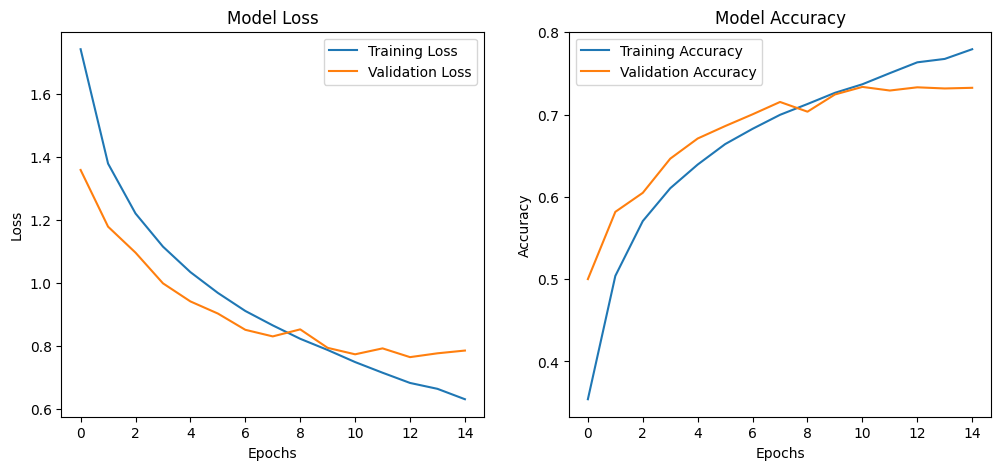

In [7]:
# Step 7: Plot Loss and Accuracy Graphs
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:

# ------------------------------------------------------------
# EXPLANATION OF EACH STEP
# ------------------------------------------------------------
# Step 1: Import Libraries
# - TensorFlow and Keras for CNN building.
# - Matplotlib for visualizing training progress.

# Step 2: Load and Preprocess Data
# - CIFAR-10 dataset: 60,000 RGB images (32x32x3) across 10 classes.
# - Normalized pixel values (0–1).
# - Labels converted to one-hot encoded vectors.

# Step 3: Define Model Architecture
# - Conv2D layers: learn spatial features like edges, textures, shapes.
# - MaxPooling2D: reduces spatial dimensions and computation.
# - Flatten: converts 2D feature maps to 1D.
# - Dense(128, relu): fully connected layer for feature combination.
# - Dropout(0.5): reduces overfitting.
# - Output: Dense(10, softmax) for 10-class probabilities.

# Step 4: Compile the Model
# - Optimizer: Adam (efficient adaptive learning rate method).
# - Loss: categorical_crossentropy (for one-hot encoded multi-class data).
# - Metric: accuracy.

# Step 5: Train the Model
# - Model trains for 15 epochs using 128 images per batch.
# - Validation data checks model performance after each epoch.

# Step 6: Evaluate the Model
# - Calculates test accuracy and loss on unseen data.
# - CNN on CIFAR-10 usually achieves 70–80% accuracy.

# Step 7: Plot Graphs
# - Training vs Validation Loss & Accuracy curves show model performance.
# - If both curves are close, model generalizes well.

# ------------------------------------------------------------
# VIVA QUESTIONS
# ------------------------------------------------------------
# Q1. What is CIFAR-10 dataset?
#     -> 60,000 color images (32x32 pixels) across 10 categories.
# Q2. Why use CNN instead of Feedforward NN for images?
#     -> CNNs preserve spatial relationships and detect features automatically.
# Q3. What does Conv2D layer do?
#     -> Applies filters to extract image features like edges and corners.
# Q4. What is the use of MaxPooling2D?
#     -> Reduces feature map size, speeds up computation, prevents overfitting.
# Q5. Why use ReLU activation?
#     -> Adds non-linearity and avoids vanishing gradient issues.
# Q6. Why use Dropout?
#     -> Randomly disables neurons to prevent overfitting.
# Q7. What does Softmax do in the output layer?
#     -> Converts the outputs into class probabilities.
# Q8. What accuracy range can we expect?
#     -> Around 70–80% for CNN on CIFAR-10.
# Q9. How can accuracy be improved?
#     -> Increase epochs, use data augmentation, or deeper CNNs (like VGG or ResNet).
# Q10. What is overfitting and how do we detect it?
#     -> When training accuracy >> validation accuracy; detected using plotted curves.
